In [1]:
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import datetime as dt    
import numpy as np                   

In [2]:
path = 'C:/Users/LENOVO/OneDrive/WaterSprint/ADB Project/CDM Data Latest_02-06-23/Kurram/Precipitation/'

In [4]:
nc = xr.open_dataset(path+'ssp245_max_Kurram.nc')

In [5]:
nc

<xarray.Dataset>
Dimensions:    (longitude: 34, latitude: 21, time: 27375)
Coordinates:
  * longitude  (longitude) float64 68.9 69.0 69.1 69.2 ... 71.9 72.0 72.1 72.2
  * latitude   (latitude) float64 32.2 32.3 32.4 32.5 ... 33.9 34.0 34.1 34.2
  * time       (time) datetime64[ns] 2025-01-01 2025-01-02 ... 2099-12-31
Data variables:
    precip     (time, latitude, longitude) float32 ...
Attributes:
    history:  Tue May 30 20:23:40 2023: ncrcat applied_max_gcm_ssp245_short_t...
    NCO:      netCDF Operators version 4.9.7 (Homepage = http://nco.sf.net, C...

In [6]:
min_lon = 70.49
min_lat = 33.28
max_lon = 70.51
max_lat = 33.32
#Thal Station (33.362,70.538)

In [7]:
filtered = nc.sel(longitude=slice(min_lon,max_lon),latitude=slice(min_lat,max_lat))

In [8]:
filtered

<xarray.Dataset>
Dimensions:    (longitude: 1, latitude: 1, time: 27375)
Coordinates:
  * longitude  (longitude) float64 70.5
  * latitude   (latitude) float64 33.3
  * time       (time) datetime64[ns] 2025-01-01 2025-01-02 ... 2099-12-31
Data variables:
    precip     (time, latitude, longitude) float32 ...
Attributes:
    history:  Tue May 30 20:23:40 2023: ncrcat applied_max_gcm_ssp245_short_t...
    NCO:      netCDF Operators version 4.9.7 (Homepage = http://nco.sf.net, C...

In [9]:
df = filtered.to_dataframe().reset_index()

In [10]:
df

,longitude,latitude,time,precip
0,70.5,33.3,2025-01-01,0.000
1,70.5,33.3,2025-01-02,18.586
2,70.5,33.3,2025-01-03,14.225
3,70.5,33.3,2025-01-04,0.000
4,70.5,33.3,2025-01-05,4.484
...,...,...,...,...
27370,70.5,33.3,2099-12-27,0.000
27371,70.5,33.3,2099-12-28,0.000
27372,70.5,33.3,2099-12-29,0.000
27373,70.5,33.3,2099-12-30,0.000


In [11]:
df['date'] = pd.to_datetime(df['time']).dt.date
df['month'] = pd.to_datetime(df['time']).dt.month

In [12]:
df.head(24)

,longitude,latitude,time,precip,date,month
0,70.5,33.3,2025-01-01,0.000,2025-01-01,1
1,70.5,33.3,2025-01-02,18.586,2025-01-02,1
2,70.5,33.3,2025-01-03,14.225,2025-01-03,1
3,70.5,33.3,2025-01-04,0.000,2025-01-04,1
4,70.5,33.3,2025-01-05,4.484,2025-01-05,1
5,70.5,33.3,2025-01-06,0.000,2025-01-06,1
6,70.5,33.3,2025-01-07,0.000,2025-01-07,1
7,70.5,33.3,2025-01-08,0.000,2025-01-08,1
8,70.5,33.3,2025-01-09,0.000,2025-01-09,1
9,70.5,33.3,2025-01-10,0.000,2025-01-10,1


In [13]:
# df1 = df.groupby(['date'],as_index=False)['kin','precip','kout','temp','press_msl'].mean()
df1 = df.groupby(['date'],as_index=False)['precip'].mean()

In [14]:
df1.to_csv('D:/Wflow/DataComparisonFuture/max_rainfall.csv')

In [156]:
df1['month'] = pd.to_datetime(df1['date']).dt.month
df1['year'] = pd.to_datetime(df1['date']).dt.year

In [157]:
# df_monthly = df1.groupby(['year','month'],as_index=False)['kin'].mean()

In [158]:
df1 

,date,max_temp,month,year
0,2025-01-01,16.858000,1,2025
1,2025-01-02,15.479000,1,2025
2,2025-01-03,9.079000,1,2025
3,2025-01-04,14.359000,1,2025
4,2025-01-05,14.553000,1,2025
...,...,...,...,...
27370,2099-12-27,26.534000,12,2099
27371,2099-12-28,22.316000,12,2099
27372,2099-12-29,21.584999,12,2099
27373,2099-12-30,22.663000,12,2099


In [159]:
# df1.to_csv("D:/Wflow/DIK/Kurram.csv")

In [160]:
df1['date'] = pd.to_datetime(df1['date'],format='%Y/%m/%d')

In [161]:
start_date = '2025-01-01'
end_date = '2049-12-31'
df2 = df1[(df1['date'] >= start_date) & (df1['date'] <= end_date)]

start_date = '2050-01-01'
end_date = '2074-12-31'
df3 = df1[(df1['date'] >= start_date) & (df1['date'] <= end_date)]

start_date = '2075-01-01'
end_date = '2099-12-31'
df4 = df1[(df1['date'] >= start_date) & (df1['date'] <= end_date)]

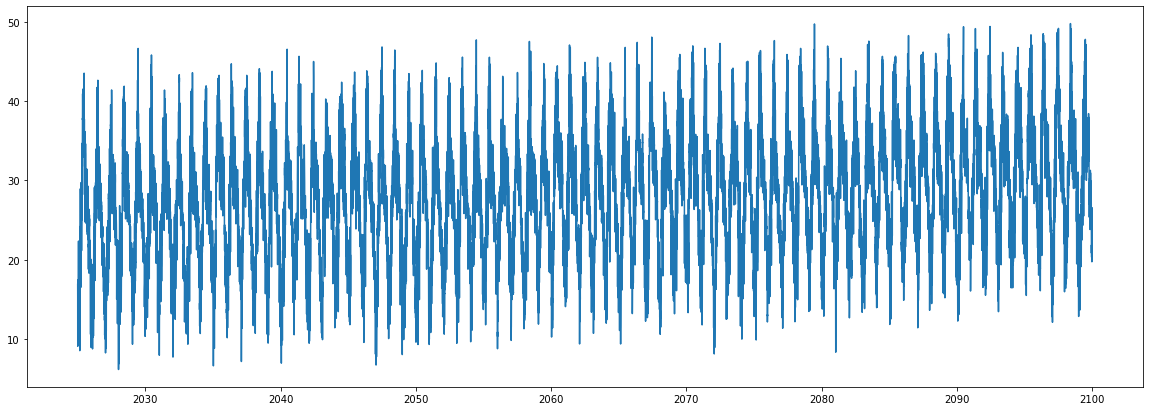

In [165]:
fig, axs = plt.subplots(nrows=1,ncols=1,figsize=(20,7))

axs.plot(df1['date'],df1['max_temp'])

# axs.plot(df2['max_temp'],label='1st')
# axs.plot(df3['max_temp'],label='2nd')
# axs.plot(df4['max_temp'],label='3rd')


# # Fit a linear regression line to the data
# coefficients = np.polyfit(range(len(df2)), df2['max_temp'], 1)
# poly = np.poly1d(coefficients)
# trendline = poly(range(len(df2)))

# # Plot the trend line
# axs.plot(df2['date'], trendline, color='red', label='Trend Line')

In [120]:
# print(poly)

 
0.000107 x + 25.24


In [68]:
0.0003617*(15339) + 165.2

170.7481163

In [70]:
(((170.7481163-165.2)/(165.2))*100)/42

0.07996247405741963